Standardization vs Normalization

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df2 = df.select_dtypes(include=[np.int64, np.float64]).keys()
df2

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

In [ ]:
df3 = df[['survived','pclass', 'age','parch']]
df3.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [ ]:
df3.isnull().sum()

,0
survived,0
pclass,0
age,177
parch,0


In [ ]:
df4 = df3.fillna(df3.mean())
df4.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [ ]:
df4.isnull().sum()

,0
survived,0
pclass,0
age,0
parch,0


In [ ]:
X = df4.drop('survived', axis=1)
y = df4['survived']

print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (891, 3)
Shape of y =  (891,)


In [ ]:
X_train, X_tes, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_tes.shape)
print('Shape of y_test = ', y_test.shape)


Shape of X_train =  (712, 3)
Shape of y_train =  (712,)
Shape of X_test =  (179, 3)
Shape of y_test =  (179,)


In [ ]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [ ]:
sc.mean_

array([ 2.30617978, 29.55409121,  0.39185393])

In [ ]:
sc.scale_             ## show standerdivation

array([ 0.84405789, 12.99162985,  0.79647463])

In [ ]:
X_train.describe()                    ### Note not necessary scaling dependent variable

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.306180,29.554091,0.391854
std,0.844651,13.000763,0.797035
min,1.000000,0.420000,0.000000
25%,1.750000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,71.000000,5.000000


In [ ]:
X_train_sc = sc.transform(X_train)
X_tes_sc = sc.transform(X_tes)

In [ ]:
X_train_sc

array([[ 0.8220055 , -0.42751304, -0.49198545],
       [ 0.8220055 ,  1.997125  , -0.49198545],
       [ 0.8220055 , -1.42815732, -0.49198545],
       ...,
       [ 0.8220055 ,  1.41983023,  3.27461284],
       [ 0.8220055 ,  0.01116307,  0.76354731],
       [ 0.8220055 , -0.08113618, -0.49198545]])

In [ ]:
X_tes_sc

array([[-1.54750023,  0.80404914, -0.49198545],
       [ 0.8220055 ,  0.18826805, -0.49198545],
       [ 0.8220055 ,  0.03432278, -0.49198545],
       [-1.54750023,  0.01116307, -0.49198545],
       [-0.36274737,  0.34221332,  0.76354731],
       [ 0.8220055 ,  0.18826805, -0.49198545],
       [-1.54750023,  1.34285759, -0.49198545],
       [ 0.8220055 , -1.04329413, -0.49198545],
       [-0.36274737,  2.80533768, -0.49198545],
       [-1.54750023, -1.12026677,  0.76354731],
       [-0.36274737,  0.11129541, -0.49198545],
       [-0.36274737, -0.1196225 , -0.49198545],
       [-1.54750023,  1.18891232, -0.49198545],
       [ 0.8220055 , -0.50448568, -0.49198545],
       [ 0.8220055 ,  0.88102177,  5.78567837],
       [-0.36274737, -0.35054041, -0.49198545],
       [-0.36274737,  0.49615859,  2.01908008],
       [ 0.8220055 ,  0.01116307, -0.49198545],
       [ 0.8220055 ,  0.01116307, -0.49198545],
       [-0.36274737, -0.81237622, -0.49198545],
       [ 0.8220055 ,  0.01116307, -0.491

In [ ]:
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_tes_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

In [ ]:
X_train_sc.head()

,pclass,age,parch
0,0.822005,-0.427513,-0.491985
1,0.822005,1.997125,-0.491985
2,0.822005,-1.428157,-0.491985
3,0.822005,-0.889349,-0.491985
4,0.822005,0.011163,2.019080


In [ ]:
X_train_sc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.55,-2.24,-0.49
25%,-0.66,-0.58,-0.49
50%,0.82,0.01,-0.49
75%,0.82,0.42,-0.49
max,0.82,3.19,5.79


In [ ]:
mmc = MinMaxScaler()            #### MinMaxScaler
mmc.fit(X_train)

MinMaxScaler()

In [ ]:
X_train_mmc = mmc.transform(X_train)
X_tes_mmc = mmc.transform(X_tes)

In [ ]:
X_train_mmc

array([[1.        , 0.33408898, 0.        ],
       [1.        , 0.78039105, 0.        ],
       [1.        , 0.14990082, 0.        ],
       ...,
       [1.        , 0.67412865, 0.6       ],
       [1.        , 0.4148359 , 0.2       ],
       [1.        , 0.39784642, 0.        ]])

In [ ]:
X_train_mmc = pd.DataFrame(X_train_mmc, columns=X_train.columns)
X_tes_mmc = pd.DataFrame(X_tes_mmc, columns=X_train.columns)

In [ ]:
X_train_mmc.head()

,pclass,age,parch
0,1.0,0.334089,0.0
1,1.0,0.780391,0.0
2,1.0,0.149901,0.0
3,1.0,0.249079,0.0
4,1.0,0.414836,0.4


In [ ]:
X_train_mmc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.65,0.41,0.08
std,0.42,0.18,0.16
min,0.00,0.00,0.00
25%,0.38,0.31,0.00
50%,1.00,0.41,0.00
75%,1.00,0.49,0.00
max,1.00,1.00,1.00


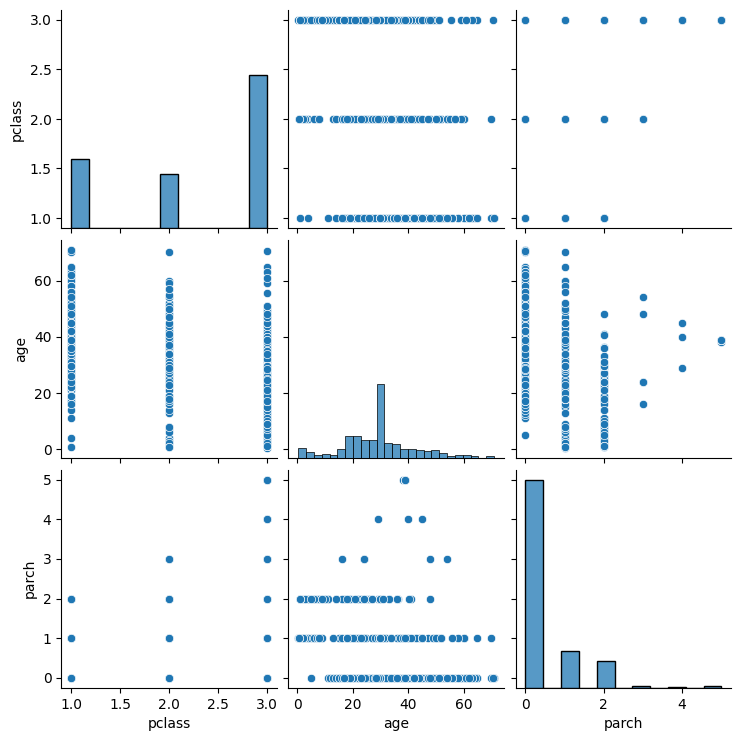

In [ ]:
sns.pairplot(X_train)

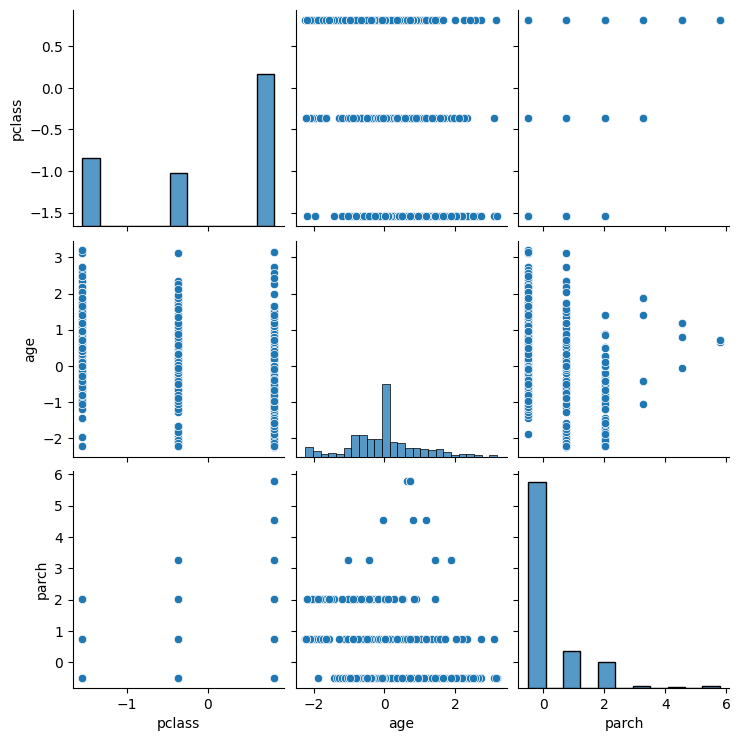

In [ ]:
sns.pairplot(X_train_sc)

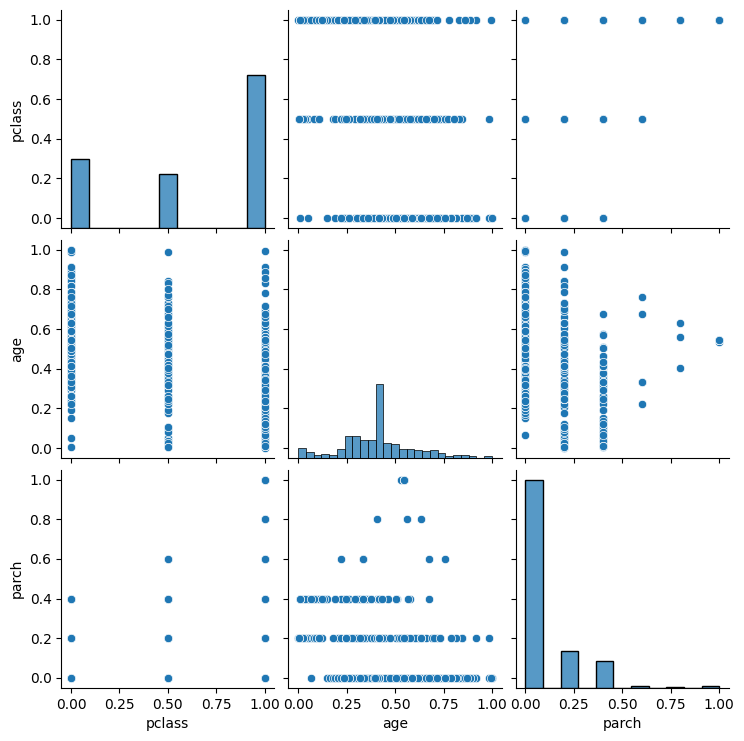

In [ ]:
sns.pairplot(X_train_mmc)